<a href="https://colab.research.google.com/github/Mahsa33/Group-Seating-Arrangement/blob/main/Group_SeatingArrangment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import random

In [2]:
first_names = [
    "آرمان",
    "نیلوفر",
    "سامان",
    "آتنا",
    "آریا",
    "آیدین",
    "شایان",
    "رویا",
    "شهرزاد",
    "پارسا",
    "روزبه",
    "زهرا",
    "مهران",
    "مریم",
    "کیان",
    "شبنم",
    "سینا",
    "نازنین",
    "میترا",
    "کامران"
]

last_names = [
    "خرم‌آبادی",
    "میرزایی",
    "احمدی",
    "رضایی",
    "قاسمی",
    "کریمی",
    "نجفی",
    "محمدی",
    "صادقی",
    "علیزاده",
    "رحمانی",
    "اسماعیلی",
    "کاظمی",
    "رستمی",
    "بهرامی",
    "حسینی",
    "موسوی",
    "زارع",
    "جعفری",
    "حیدری"
]
names = [f"{first_name} {last_name}" for first_name in first_names for last_name in last_names]

print(len(names))
print(names)

400
['آرمان خرم\u200cآبادی', 'آرمان میرزایی', 'آرمان احمدی', 'آرمان رضایی', 'آرمان قاسمی', 'آرمان کریمی', 'آرمان نجفی', 'آرمان محمدی', 'آرمان صادقی', 'آرمان علیزاده', 'آرمان رحمانی', 'آرمان اسماعیلی', 'آرمان کاظمی', 'آرمان رستمی', 'آرمان بهرامی', 'آرمان حسینی', 'آرمان موسوی', 'آرمان زارع', 'آرمان جعفری', 'آرمان حیدری', 'نیلوفر خرم\u200cآبادی', 'نیلوفر میرزایی', 'نیلوفر احمدی', 'نیلوفر رضایی', 'نیلوفر قاسمی', 'نیلوفر کریمی', 'نیلوفر نجفی', 'نیلوفر محمدی', 'نیلوفر صادقی', 'نیلوفر علیزاده', 'نیلوفر رحمانی', 'نیلوفر اسماعیلی', 'نیلوفر کاظمی', 'نیلوفر رستمی', 'نیلوفر بهرامی', 'نیلوفر حسینی', 'نیلوفر موسوی', 'نیلوفر زارع', 'نیلوفر جعفری', 'نیلوفر حیدری', 'سامان خرم\u200cآبادی', 'سامان میرزایی', 'سامان احمدی', 'سامان رضایی', 'سامان قاسمی', 'سامان کریمی', 'سامان نجفی', 'سامان محمدی', 'سامان صادقی', 'سامان علیزاده', 'سامان رحمانی', 'سامان اسماعیلی', 'سامان کاظمی', 'سامان رستمی', 'سامان بهرامی', 'سامان حسینی', 'سامان موسوی', 'سامان زارع', 'سامان جعفری', 'سامان حیدری', 'آتنا خرم\u200cآبادی', 'آتن

In [3]:
import random
import torch
import matplotlib.pyplot as plt

class SeatingArrangement:
    def __init__(self, num_people, rows, cols):
        self.num_people = num_people
        self.rows = rows
        self.cols = cols
        self.seating_order = self.generate_seating_order()
        self.groups = self.create_groups()
        self.group_matrix = self.shuffle_groups_and_create_matrix()
        self.conflict_matrix_person = None
        self.conflict_matrix_group_ref = None

    def generate_seating_order(self):
        person_ids = [i for i in range(self.num_people)]
        random.shuffle(person_ids)

        seating_order = torch.zeros(self.rows, self.cols)
        k = 0
        for i in range(self.rows):
            for j in range(self.cols):
                seating_order[i, j] = person_ids[k]
                k += 1

        return seating_order.float()

    def create_groups(self):
        groups_lst = [self.seating_order[i][j:j+5]  for i in range(self.seating_order.shape[0]) for j in range(0, self.seating_order.shape[1], 5)]
        groups = {i: groups_lst[i].tolist() for i in range(len(groups_lst))}

        print('Number of groups:', len(groups))
        print('********************************')
        return groups

    def shuffle_groups_and_create_matrix(self):
        group_indices = [i for i in self.groups.keys()]
        random.shuffle(group_indices)

        group_tensor = torch.tensor(group_indices)
        group_matrix = group_tensor.reshape((self.rows, self.cols // 5))

        return group_matrix

    def find_group(self, num):
        for i, group in self.groups.items():
            if num in group:
                return i
        return -1

    def create_conflict_matrix_person(self):
        conflict_matrix = torch.zeros(self.num_people, self.num_people)
        count_one = 0
        incompatible_pairs = []

        while count_one < 600:
            i = random.randint(0, self.num_people-1)
            j = random.randint(0, self.num_people-1)
            i_group = self.find_group(i)
            j_group = self.find_group(j)

            if i_group != j_group and conflict_matrix[i][j] == 0:
                conflict_matrix[i][j] = 1
                count_one += 1
                incompatible_pairs.append((i, j))

        self.conflict_matrix_person = conflict_matrix.float()
        return incompatible_pairs

    def create_conflict_matrix_group(self):
        conflict_matrix = torch.zeros(len(self.groups), len(self.groups))

        for i, group_i in self.groups.items():
            for j, group_j in self.groups.items():
                if i != j:
                    conflict = sum(self.conflict_matrix_person[int(person_i), int(person_j)] for person_i in group_i for person_j in group_j)
                    conflict_matrix[i, j] = conflict

        self.conflict_matrix_group_ref = conflict_matrix
        return self.conflict_matrix_group_ref

    def analyze_adj_group_conflicts(self):
        group_conflict_matrix = torch.zeros(self.rows, self.cols // 5)

        for i in range(self.rows):
            for j in range(self.cols // 5):
                group = self.group_matrix[i, j]
                if i > 0:
                    group_conflict_matrix[i, j] += self.conflict_matrix_group_ref[group, self.group_matrix[i - 1][j]]
                if i < self.rows - 1:
                    group_conflict_matrix[i, j] += self.conflict_matrix_group_ref[group, self.group_matrix[i + 1][j]]
                if j > 0:
                    group_conflict_matrix[i, j] += self.conflict_matrix_group_ref[group, self.group_matrix[i][j - 1]]
                if j < self.cols // 5 - 1:
                    group_conflict_matrix[i, j] += self.conflict_matrix_group_ref[group, self.group_matrix[i][j + 1]]

        return group_conflict_matrix

    def find_incompatible_pairs(self, group_conflict_matrix):
        return [(i, j) for i in range(group_conflict_matrix.shape[0]) for j in range(group_conflict_matrix.shape[1]) if group_conflict_matrix[i, j] != 0]

    def get_conflicted_groups(self, incompatible_pairs):
        return [int(self.group_matrix[i][j]) for i, j in incompatible_pairs]

    def swap_conflict_groups(self, incompatible_pairs, conflicted_groups):
        for coord, value in zip(incompatible_pairs, conflicted_groups):
            i, j = coord
            self.group_matrix[i, j] = value
        return self.group_matrix

    def update_conflict_matrix(self, new_group_matrix):
        return self.analyze_adj_group_conflicts()

    def plot_conflict_matrix(self):
        fig, ax = plt.subplots(figsize=(16, 16))
        cax = ax.matshow(self.conflict_matrix_group_ref, cmap='Blues')
        fig.colorbar(cax)
        ax.set_xticks(range(len(self.conflict_matrix_group_ref)))
        ax.set_yticks(range(len(self.conflict_matrix_group_ref)))
        ax.set_xticklabels(range(1, len(self.conflict_matrix_group_ref) + 1))
        ax.set_yticklabels(range(1, len(self.conflict_matrix_group_ref) + 1))
        plt.xticks(rotation=90)

        for i in range(len(self.conflict_matrix_group_ref)):
            for j in range(len(self.conflict_matrix_group_ref)):
                plt.text(j, i, int(self.conflict_matrix_group_ref[i, j].item()), ha="center", va="center", color='gray')

        plt.show()



In [4]:
num_groups = 80

class SeatingNet(nn.Module):
    def __init__(self):
        super(SeatingNet, self).__init__()
        self.fc1 = nn.Linear(num_groups, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, num_groups)

    def forward(self, x):
        out = self.fc1(x)
        out = torch.relu(out)
        out = self.fc2(out)
        out = torch.relu(out)
        out = self.fc3(out)
        out = torch.relu(out)
        out = self.fc4(out)
        return out


model = SeatingNet()


def loss(output, conflict_matrix):

    probabilities = torch.softmax(output, dim=1)
    probabilities = probabilities.reshape(num_groups)

    penalty = 0
    for i in range(num_groups-1):
      for j in range(i + 1, num_groups-1):
        if conflict_matrix[i, j] == 1:
          penalty += probabilities[i] * probabilities[j]


    return penalty

optimizer = optim.Adam(model.parameters())

Number of groups: 80
********************************
seating_order for 400 people: tensor([[173., 226.,  26.,  65., 382., 250., 398., 217., 331., 192.],
        [256., 108.,  73., 278., 202., 318., 252.,  85., 135., 268.],
        [314., 277., 264., 281., 114., 298., 378., 295., 100., 329.],
        [149.,  58., 236., 263., 307., 279., 383., 222., 187., 102.],
        [147.,  87., 246., 297., 175., 357., 128., 196., 387., 288.],
        [328., 174., 267., 104., 397., 317.,   5., 216., 242., 276.],
        [303.,  66., 257., 228., 146., 220.,  82., 336., 360., 177.],
        [ 93.,  92.,  83., 323., 176., 362., 185.,  49., 151.,  88.],
        [ 64., 358.,  67., 392., 344.,   8., 304., 111.,  79., 122.],
        [375., 121.,  38., 200.,  99., 171.,  50., 395., 150., 209.],
        [248., 302.,  84., 275., 350.,  78., 105.,  32., 287., 156.],
        [178., 291., 308., 181., 131., 133.,  68., 141., 333.,  15.],
        [352., 223., 167.,  54., 284., 393.,  19.,  72., 369., 118.],
      

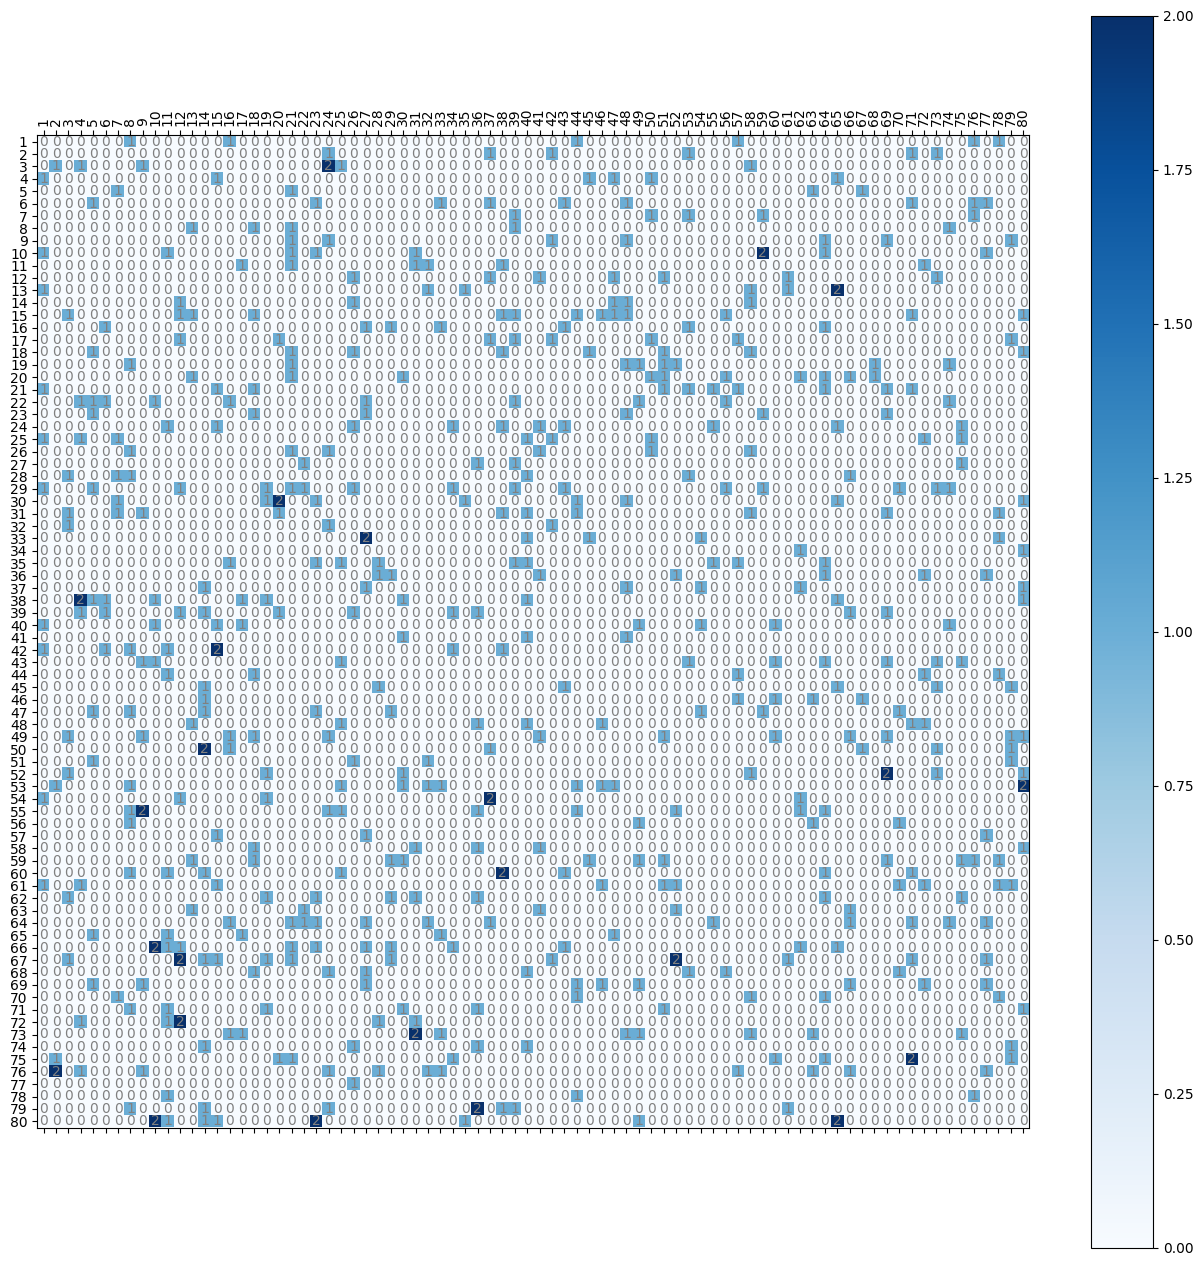

40*2 shuffled groups matrix: tensor([[33,  7],
        [29, 70],
        [25, 79],
        [16, 59],
        [ 3, 63],
        [60, 39],
        [22, 28],
        [68, 43],
        [10, 66],
        [44, 34],
        [77,  4],
        [12, 54],
        [26, 18],
        [65,  2],
        [32, 36],
        [72, 69],
        [38, 37],
        [30, 21],
        [35, 73],
        [13, 20],
        [ 8, 24],
        [ 1,  5],
        [23, 19],
        [46, 47],
        [53, 49],
        [51, 41],
        [11, 75],
        [56, 17],
        [61, 78],
        [57, 42],
        [15,  6],
        [71, 64],
        [52, 14],
        [45, 31],
        [55, 48],
        [67, 74],
        [ 0, 50],
        [62, 58],
        [ 9, 40],
        [76, 27]])
Analysis of neighborhood relationship between groups: tensor([[0., 0.],
        [0., 3.],
        [0., 0.],
        [0., 1.],
        [0., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]

In [5]:
rows, cols = 40 , 10
num_people = 400

seating_arrangement = SeatingArrangement(400, 40, 10)

seating_order = seating_arrangement.seating_order
print('seating_order for 400 people:', seating_order)

incompatible_persons_ref = seating_arrangement.create_conflict_matrix_person()
print('incompatible persons in 400*400 matrix:', incompatible_persons_ref)

groups = seating_arrangement.groups
print('Groups of 5 people:', groups)

incompatible_groups_ref = seating_arrangement.create_conflict_matrix_group()
print('incompatible groups in 80*80 matrix:', incompatible_groups_ref)
seating_arrangement.plot_conflict_matrix()

groups_matrix = seating_arrangement.group_matrix
print('40*2 shuffled groups matrix:', groups_matrix)


group_conflict_matrix = seating_arrangement.analyze_adj_group_conflicts()
print('Analysis of neighborhood relationship between groups:', group_conflict_matrix)

for epoch in range(20):

  if epoch != 0:

    for key in groups:
      random.shuffle(groups[key])


    incompatible_groups_ref = seating_arrangement.create_conflict_matrix_group()
    print('incompatible groups in 80*80 matrix:', incompatible_groups_ref)

    group_conflict_matrix = seating_arrangement.analyze_adj_group_conflicts()
    print('Analysis of neighborhood relationship between groups:', group_conflict_matrix)

    incompatible_group_pairs = seating_arrangement.find_incompatible_pairs(group_conflict_matrix)
    print('Pairs of indices in cnflict matrix groups that have problems with each other:', incompatible_group_pairs)

    conflicted_groups = seating_arrangement.get_conflicted_groups(incompatible_group_pairs)
    print('groups that have problems:', conflicted_groups)

    if len(conflicted_groups) == 1 or len(conflicted_groups) == 0:
      zero_tensor = torch.zeros(num_people, num_people)
      groups_lst = []

      for i in range(groups_matrix.shape[0]):
        for j in range(groups_matrix.shape[1]):
          group_id = groups_matrix[i, j]
          group_members = groups[int(group_id)]
          groups_lst.append(group_members)


      group_tensor = torch.tensor(groups_lst)
      group_matrix_final = group_tensor.reshape((rows, cols))
      print('final arrangment:', group_matrix_final)
      break

    random.shuffle(conflicted_groups)

    new_group_matrix = seating_arrangement.swap_conflict_groups(incompatible_group_pairs, conflicted_groups)
    print('new generated seating order for groups:', new_group_matrix)

    new_conflict_matrix = seating_arrangement.update_conflict_matrix(new_group_matrix)
    print('update conflict seating order for groups:', new_conflict_matrix)

    if len(conflicted_groups) == 2 and torch.sum(new_conflict_matrix == 1) == 2:
        if loss_value < 1.000000e-06:
          break

    groups_matrix = new_group_matrix
    group_conflict_matrix = new_conflict_matrix

  # پیش‌بینی احتمال نشستن برای هر نفر
  output = model(torch.FloatTensor(group_conflict_matrix).view(-1, rows* (cols // 5)))


  loss_value = loss(output, incompatible_groups_ref)
  prev_loss = loss_value

  # صفر کردن گرادیان‌ها
  optimizer.zero_grad()

  # محاسبه گرادیان‌ها
  loss_value.backward()

  # به‌روزرسانی پارامترهای مدل
  optimizer.step()

  # نمایش loss
  print(f"Epoch {epoch + 1}: loss = {loss_value.item():.7}")



